In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

#####################请修改成自己存储数据的路径名####################################
print(os.listdir("E:/input"))
print(os.listdir("E:/input/bike-sharing-dataset"))
#####################请修改成自己存储数据的路径名####################################

# Any results you write to the current directory are saved as output.

['bike-sharing-dataset', 'pima-diabetes']
['day.csv', 'hour.csv']


In [2]:
#############################填写：将hour.csv文件读入到raw###########################################
raw =

#############################填写：将hour.csv文件读入到raw###########################################

## Now, we are going to explore that data and understand it. The description reads as this

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
#####################填写：实现功能：查看读入数据的前5行###################################




#####################填写：实现功能：查看读入数据的前5行####################################

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011/1/1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011/1/1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011/1/1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011/1/1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Lets get a deeper look

In [4]:
raw.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##  Lets check the categorical variables now.

### We have some variables such as the week days in which we do NOT really want to use numbers, but we just simply want to denotate whether or not a bicycle was used in a given day (Monday, Tuesday). At the moment that is done by assigning to the column "weekday" a value between 0 and 6, we want to change that... lets use dummy variables

In [5]:

def generate_dummies(df, dummy_column):
    
    #####################填写：实现功能：将dummy_column中的特征转变成one-hot特征###################################
    dummies = 
    
    
    #####################填写：实现功能：将dummy_columns中的特征转变成one-hot特征####################################
    
    df = pd.concat([df, dummies], axis=1)###############将转变后的特征连接到df之后#################
    return df

X = pd.DataFrame.copy(raw)
dummy_columns = ["season",     # season (1:springer, 2:summer, 3:fall, 4:winter)
                 "yr",          # year (0: 2011, 1:2012)
                 "mnth",        # month ( 1 to 12)
                 "hr",          # hour (0 to 23)
                 "weekday",     # weekday : day of the week
                 "weathersit"   # weathersit : 
                                 # - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                 # - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                 # - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                 # - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                ]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [6]:
X.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011/1/1,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011/1/1,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011/1/1,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011/1/1,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011/1/1,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


In [7]:
X.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

## Now we need to drop the columns used originally for dummies, notice that now we have weekday_0, weekday_1 ... weekday_6, which represents Sunday to Monday (personal note here!!: I am Spanish and in Spain weekday 0 would be Monday... in English however the first day of the week is Sunday... keep in in mind!)

### In any case, despite having weekday_1... weekday_6 we still have the column weekday, which is of no use already, so lets remove it along with the rest of dummy columns

In [8]:
for dummy_column in dummy_columns:
    #####################填写：实现功能：删除X中的第dummy_column列###################################

    
    #####################填写：实现功能：删除X中的第dummy_column列###################################

X.columns

Index(['instant', 'dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

### And now, lets see how our data looks like

In [9]:
X.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011/1/1,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011/1/1,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011/1/1,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011/1/1,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011/1/1,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [10]:
X.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,...,0.142643,0.141147,0.142413,0.142183,0.143104,0.144542,0.656712,0.261465,0.081650,0.000173
std,5017.0295,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,...,0.349719,0.348184,0.349484,0.349248,0.350189,0.351649,0.474820,0.439445,0.273839,0.013138
min,1.0000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8690.0000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13034.5000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,17379.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Time for us to plot some data and get an idea of what's going on here

In [11]:
first_3_weeks = 3*7*24 # 3 weeks (7 days), 24 hours each day
#####################填写：实现功能：对X中前first_3_weeks数据画图，x轴为dteday，y轴为cnt，size为（18，5）###################################

    
    
#####################填写：实现功能：对X中前first_3_weeks数据画图，x轴为dteday，y轴为cnt，size为（18，5）######################################


### It is also obvious that we do not need the "instant", "'dteday" columns, lets remove them

In [12]:
del X["instant"]
del X["dteday"]

### Finally, we need to declare which one will be our "target" column, that is, what do we want to predict? in this case it would be either "casual", "registered" or "cnt". I will use "cnt"

In [13]:
y = X["cnt"]
del X["cnt"]
del X["registered"]
del X["casual"]

In [14]:
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## We will now split into train data and test data, using 70% as train data

In [15]:
all_days = len(X) // 24
print("Total observations", len(X))
print("Total number of days", all_days)
days_for_training = int(all_days * 0.7)

#####################填写：实现功能：X_train赋值为X中的前days_for_training行数据，X_test赋值为其余数据###################################
X_train = 
X_test =

#####################填写：实现功能：X_train赋值为X中的前days_for_training行数据，X_test赋值为其余数据###################################

Total observations 17379
Total number of days 724


In [16]:
print("Observations for training", len(X_train))
print("Observations for testing", len(X_test))
print("Some target values", y.head())

Observations for training 506
Observations for testing 16873
Some target values 0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64


### We still need to normalize our target values!

In [17]:

#####################填写：实现功能：将y进行最小最大标准化###################################

y_normalized =

#####################填写：实现功能：将y进行最小最大标准化###################################

y_normalized.head()

y_train = y[0:days_for_training]
y_test = y[days_for_training:]
y_train_normalized = y_normalized[0:days_for_training]
y_test_normalized = y_normalized[days_for_training:]

## We will now build a simple model

In [18]:
####################################实现利用keras调用神经网络的建模功能#################################################
from keras.models import Sequential
from keras.layers import Dense, Dropout

features = X.shape[1]                                 #获取特征的个数
model = Sequential()                                  #建立顺序模型
#####################填写：实现功能：该部分为设置网络模型##########################
#1、设置第一层隐藏层网络，节点个数为13个，输入层特征个数为features，激活函数为relu


#2、在第一层隐藏层中删掉一些神经元，增加随机性，避免过拟合


#3、设置输出层，节点个数为1，激活函数为linear

                        
#####################填写：实现功能：该部分为设置网络模型##########################
model.summary()            #显示model的结构


Using TensorFlow backend.
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                780       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


In [19]:
###########设置权值更新算法——梯度下降算法##############
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mean_squared_error")
###########设置权值更新算法——梯度下降算法##############

W1017 17:21:56.555740 11128 deprecation_wrapper.py:119] From D:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
##############修改：生成model，尝试修改epochs值##########
results = model.fit(X_train, y_train_normalized, epochs=10, validation_data = (X_test, y_test_normalized))
##############修改：生成model，尝试修改epochs值##########

W1017 17:21:56.685423 11128 deprecation_wrapper.py:119] From D:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 506 samples, validate on 16873 samples
Epoch 1/10
506/506 [==============================] - 2s 4ms/step - loss: 0.1336 - val_loss: 0.0952
Epoch 2/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0438 - val_loss: 0.0878
Epoch 3/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0289 - val_loss: 0.0839
Epoch 4/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0216 - val_loss: 0.0812
Epoch 5/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0153 - val_loss: 0.0796
Epoch 6/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0155 - val_loss: 0.0784
Epoch 7/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0113 - val_loss: 0.0773
Epoch 8/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0102 - val_loss: 0.0766
Epoch 9/10
506/506 [==============================] - 1s 1ms/step - loss: 0.0105 - val_loss: 0.0756
Epoch 10/10
506/506 [==============================]

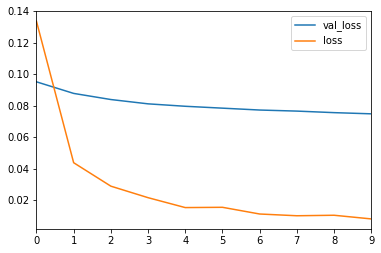

In [21]:
results.history
pd.DataFrame.from_dict(results.history).plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_test_normalized=np.array(y_test_normalized)

##############填写：实现功能：测试集为X_test，利用model预测y_pred##########
y_pred =                

##############填写：实现功能：测试集为X_test，利用model预测y_pred##########


##############填写：实现功能：利用y_test_normalized和y_pred计算rmse和r2##########
rmse = 
r2 = 
##############填写：实现功能：利用y_test_normalized和y_pred计算rmse和r2##########

print("RMSE:",rmse)
print("R2:",r2)